# 직원 이직 여부 예측
![](https://github.com/Jangrae/img/blob/master/employee.png?raw=true)

## 데이터 정보
- Attrition: 이직여부 (1-Yes 0-No)	
- Age: 나이	
- BusinessTravel: 출장 빈도
- Department: 현재 부서	
- DistanceFromHome: 집과 직장 사이의 거리 (마일)	
- Education: 교육수준 (1-Below College 2-College 3-Bachelor 4- Master 5-Doctor)
- EducationField: 전공	
- EmployeeNumber: 사번	
- EnvironmentSatisfaction: 근무환경에 대한 만족도 (1-Low 2-Good 3-Excellent 4-Outstanding)
- Gender: 성별	
- JobInvolvement: 직무 적극성, 참여도 (1-Low 2-Medium 3-High 4-Very High)
- JobRole: 직무	
- JobSatisfaction: 직무 만족도 (1-Low 2-Medium 3-High 4-Very High)
- MaritalStatus: 결혼상태	
- MonthlyIncome: 월급	
- NumCompaniesWorked: 현재까지 근무한 회사 수	
- OverTime: 야근 여부	
- PercentSalaryHike: 전년대비 급여 인상율 (%)	
- RelationshipSatisfaction: 동료와의 관계 만족도 (1-Low 2-Medium 3-High 4-Very High)
- StockOptionLevel: 스톡옵션 수준 (0 ~ 3)	
- TotalWorkingYears: 총 근무 연수	
- TrainingTimesLastYear: 전년 교육훈련 횟수	
- WorkLifeBalance: 워라밸, 일과 삶의 균형도 (1-Bad 2-Good 3-Better 4-Best)
- YearsAtCompany: 현 직장 근무 연수	
- YearsInCurrentRole: 현 직무 연수	
- YearsWithCurrManager: 현 팀장과 근무한 연수

## 데이터셋 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/Attrition_NA.CSV'

data = pd.read_csv(path)

## 데이터 전처리

* 주석을 상세하게 작성해주세요

<details><summary>Hint</summary>

- x, y 구분 필요
- train, test 구분 필요
- 데이터 타입 전처리 필요
- 데이터 인코딩 필요
- null값 확인 필요

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition                 1250 non-null   object 
 1   Age                       1250 non-null   int64  
 2   BusinessTravel            1250 non-null   object 
 3   Department                1250 non-null   object 
 4   DistanceFromHome          1196 non-null   float64
 5   Education                 1250 non-null   int64  
 6   EducationField            1250 non-null   object 
 7   EmployeeNumber            1250 non-null   int64  
 8   EnvironmentSatisfaction   1250 non-null   int64  
 9   Gender                    1250 non-null   object 
 10  JobInvolvement            1250 non-null   int64  
 11  JobRole                   1250 non-null   object 
 12  JobSatisfaction           1250 non-null   int64  
 13  MaritalStatus             1250 non-null   object 
 14  MonthlyI

In [4]:
data.head()

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,No,33,Travel_Rarely,Research & Development,7.0,3,Medical,817,3,Male,...,No,11,4,0,14,3,4,13,9,7
1,No,35,Travel_Frequently,Research & Development,18.0,2,Life Sciences,1412,3,Male,...,No,11,3,0,10,2,3,2,2,2
2,No,42,Travel_Rarely,Research & Development,6.0,3,Medical,1911,3,Male,...,No,13,2,1,18,3,4,13,7,7
3,No,46,Travel_Rarely,Sales,2.0,3,Marketing,1204,3,Female,...,No,23,1,0,28,2,3,26,15,9
4,No,39,Travel_Frequently,Sales,NaN,3,Life Sciences,1812,3,Male,...,No,18,4,1,7,6,3,2,1,2


In [5]:
data['Attrition'].value_counts()

No     1050
Yes     200
Name: Attrition, dtype: int64

In [6]:
# 직원이직여부(타켓변수) 데이터 변환
data['Attrition'] = data['Attrition'].map({"No":0, "Yes":1})

In [7]:
data['Attrition'].value_counts()

0    1050
1     200
Name: Attrition, dtype: int64

In [8]:
# 성별데이터 확인
# 대부분의 직원이 남자로 이루어져 있으므로 남자 1 여자 0으로 변경
data['Gender'].value_counts()

Male      760
Female    490
Name: Gender, dtype: int64

In [9]:
data['Gender'] = data['Gender'].map({"Female":0, "Male":1})

In [10]:
# 출장빈도수가 없음, 적게, 빈번하게로 나타나기 때문에 이직여부에 영향이 적은 데이터를 0으로 설정
# 없음 :0, 적게:1 빈번하게:2로 변환
data['BusinessTravel'].value_counts()

Travel_Rarely        892
Travel_Frequently    230
Non-Travel           128
Name: BusinessTravel, dtype: int64

In [11]:
# 출장빈도 데이터 변환
data['BusinessTravel'] = data['BusinessTravel'].map({"Non-Travel":0, "Travel_Rarely":1, 'Travel_Frequently':2})

In [12]:
data['BusinessTravel'].value_counts()

1    892
2    230
0    128
Name: BusinessTravel, dtype: int64

In [13]:
# 야근여부 또한 있다 아니다로 분류하고 이직에 영향이 적은 변수를 0로 설정.
# 없음:0 있음:1
data['OverTime'].value_counts()

No     896
Yes    354
Name: OverTime, dtype: int64

In [14]:
# 데이터 변환
data['OverTime'] = data['OverTime'].map({"No":0, "Yes":1})

In [15]:
data['OverTime'].value_counts()

0    896
1    354
Name: OverTime, dtype: int64

In [16]:
# 이직여부와의 관련성이 있는지 모른다.
# 빈도수가 적은 것을 기준으로 0~8로 치환
data['JobRole'].value_counts()

Sales Executive              283
Research Scientist           246
Laboratory Technician        227
Manufacturing Director       123
Healthcare Representative    110
Manager                       87
Research Director             66
Sales Representative          65
Human Resources               43
Name: JobRole, dtype: int64

In [17]:
data['JobRole'] = data['JobRole'].map({"Human Resources":0, "Sales Representative":1, 'Research Director':2,
                                      'Manager':3, "Healthcare Representative":4, "Manufacturing Director":5,
                                      'Laboratory Technician':6, 'Research Scientist':7, 'Sales Executive':8})

In [18]:
data['JobRole'].value_counts()

8    283
7    246
6    227
5    123
4    110
3     87
2     66
1     65
0     43
Name: JobRole, dtype: int64

In [19]:
# 이직여부와의 관련성이 있는지 모른다.
# 부서별 빈도수를 기준으로 적은것을 0으로 설정
data['Department'].value_counts()

Research & Development    819
Sales                     379
Human Resources            52
Name: Department, dtype: int64

In [20]:
# Human Resources:0 , Sales:1, Research&Development:2
data['Department'] = data['Department'].map({"Human Resources":0, "Sales":1, 'Research & Development':2})

In [21]:
data['Department'].value_counts()

2    819
1    379
0     52
Name: Department, dtype: int64

In [22]:
# 이직여부와의 관련성이 있는지 모른다.
# 이혼여부 빈도수를 기준으로 적은것을 0으로 설정
data['MaritalStatus'].value_counts()

Married     570
Single      404
Divorced    276
Name: MaritalStatus, dtype: int64

In [23]:
data['MaritalStatus'] = data['MaritalStatus'].map({"Divorced":0, "Single":1, 'Married':2})

In [24]:
# 결측치 확인
data.isna().sum()

Attrition                    0
Age                          0
BusinessTravel               0
Department                   0
DistanceFromHome            54
Education                    0
EducationField               0
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                       0
JobInvolvement               0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
NumCompaniesWorked          21
OverTime                     0
PercentSalaryHike            0
RelationshipSatisfaction     0
StockOptionLevel             0
TotalWorkingYears            0
TrainingTimesLastYear        0
WorkLifeBalance              0
YearsAtCompany               0
YearsInCurrentRole           0
YearsWithCurrManager         0
dtype: int64

In [25]:
print('최빈값 :',data['DistanceFromHome'].mode())

최빈값 : 0    2.0
dtype: float64


In [26]:
# 집과의 거리 데이터의 최소값 1 최빈값 2
# 답변이 없는 결측치는 회사 숙소 이용 가능성이 있다.
# 결측치를 숙소이용 데이터로 가정하고 0으로 변환
data['DistanceFromHome'].describe()

count    1196.000000
mean        9.258361
std         8.166016
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

In [27]:
# 데이터의 75%가 4년 미만에 분포
# 평균이 데이터를 대표하지 못함
# 최빈값으로 치환
data['NumCompaniesWorked'].describe()

count    1229.000000
mean        2.678600
std         2.473647
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         9.000000
Name: NumCompaniesWorked, dtype: float64

In [28]:
# 결측치 채우기
data['DistanceFromHome'].fillna(0, inplace=True)
data['NumCompaniesWorked'].fillna(data['NumCompaniesWorked'].value_counts().idxmax(), inplace=True)
data.isna().sum()

Attrition                   0
Age                         0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsWithCurrManager        0
dtype: int64

In [29]:
# 대학시절 전공은 현재 일하고 있는 직무로 대체할 수 있고, 사번은 이직여부와 관련이 적다고 생각하여 제거
data.drop(['EmployeeNumber', 'EducationField'], axis=1, inplace=True)
data.head()

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,...,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,0,33,1,2,7.0,3,3,1,3,2,...,0,11,4,0,14,3,4,13,9,7
1,0,35,2,2,18.0,2,3,1,3,5,...,0,11,3,0,10,2,3,2,2,2
2,0,42,1,2,6.0,3,3,1,3,2,...,0,13,2,1,18,3,4,13,7,7
3,0,46,1,1,2.0,3,3,0,3,3,...,0,23,1,0,28,2,3,26,15,9
4,0,39,2,1,0.0,3,3,1,3,8,...,0,18,4,1,7,6,3,2,1,2


In [30]:
# target 확인
target = 'Attrition'

# 데이터 분리
x = data.drop(target, axis=1)
y = data[target]

In [31]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1250 non-null   int64  
 1   BusinessTravel            1250 non-null   int64  
 2   Department                1250 non-null   int64  
 3   DistanceFromHome          1250 non-null   float64
 4   Education                 1250 non-null   int64  
 5   EnvironmentSatisfaction   1250 non-null   int64  
 6   Gender                    1250 non-null   int64  
 7   JobInvolvement            1250 non-null   int64  
 8   JobRole                   1250 non-null   int64  
 9   JobSatisfaction           1250 non-null   int64  
 10  MaritalStatus             1250 non-null   int64  
 11  MonthlyIncome             1250 non-null   int64  
 12  NumCompaniesWorked        1250 non-null   float64
 13  OverTime                  1250 non-null   int64  
 14  PercentS

In [32]:
# train, test 분리
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2022)

## 모델링

1. 전처리에서 제외한 feature를 제외한, 다른 feature는 반드시 모두 사용하셔야 합니다.
2. locally connected layer를 최소 4개 이상 만드세요.
3. 모델 구조 시각화까지 해주면 좋습니다.
4. 학습 횟수는 최대 25번까지만.
---
### **locally하게 연결한 구성 의도를 반드시 상세하게 남겨주세요 (상황 가정을 해서라도!)** 
### **주석 역시 상세하게 남겨주세요**

### Locally connected layer를 구성하기 위한 feature 설정

In [33]:
# 직무, 개인정보, 보상, 경력, 만족도로 구분

# 직무(JobRole, Department, Education, JobInvolvement, BusinessTravel, OverTime, TrainingTimesLastYear)
# 지금 수행하고 있는 직무와 업무 환경으로 구성
role_tr = x_train[['JobRole', 'Department', 'Education', 'JobInvolvement', 'BusinessTravel', 'OverTime', 'TrainingTimesLastYear']]
role_te = x_test[['JobRole', 'Department', 'Education', 'JobInvolvement', 'BusinessTravel', 'OverTime', 'TrainingTimesLastYear']]

# 개인정보(Age, DistanceFromHome, Gender, MaritalStatus)
# 현재 개인의 상황으로 구성
per_tr = x_train[['Age', 'DistanceFromHome', 'Gender', 'MaritalStatus']]
per_te = x_test[['Age', 'DistanceFromHome', 'Gender', 'MaritalStatus']]
# 보상(MonthlyIncome, PercentSalaryHike, StockOptionLevel)
# 현재 회사에서 받고있는 대우 및 보상으로 구성
reward_tr = x_train[['MonthlyIncome', 'PercentSalaryHike', 'StockOptionLevel']]
reward_te = x_test[['MonthlyIncome', 'PercentSalaryHike', 'StockOptionLevel']]

# 경력(YearsAtCompany, YearsInCurrentRole, YearsWithCurrManager, TotalWorkingYears, NumCompaniesWorked)
# 근무한 경력과 기간으로 구성
car_tr = x_train[['YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager', 'TotalWorkingYears', 'NumCompaniesWorked']]
car_te = x_test[['YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager', 'TotalWorkingYears', 'NumCompaniesWorked']]

# 만족도(EnvironmentSatisfaction, JobSatisfaction, RelationshipSatisfaction, WorkLifeBalance)
# 현재 상황에 대한 만족도로 구성
sat_tr = x_train[['EnvironmentSatisfaction', 'JobSatisfaction', 'RelationshipSatisfaction', 'WorkLifeBalance']]
sat_test = x_test[['EnvironmentSatisfaction', 'JobSatisfaction', 'RelationshipSatisfaction', 'WorkLifeBalance']]

In [34]:
role_tr.shape, per_tr.shape, reward_tr.shape, car_tr.shape, sat_tr.shape

((1000, 7), (1000, 4), (1000, 3), (1000, 5), (1000, 4))

### 모델 코드 작성

In [35]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Add, Concatenate
from tensorflow.keras.backend import clear_session

In [36]:
# 세션 클리어
clear_session()
# 모델 레이어 엮기
il_role = Input(shape=(7,))
hl_role = Dense(128, activation='relu')(il_role)

il_per = Input(shape=(4,))
hl_per = Dense(128, activation='relu')(il_per)

il_reward = Input(shape=(3))
hl_reward = Dense(128, activation='relu')(il_reward)

il_car = Input(shape=(5))
hl_car = Dense(128, activation='relu')(il_car)

il_sat = Input(shape=(4,))
hl_sat = Dense(128, activation='relu')(il_sat)

add = Add()([hl_role, hl_per, hl_reward, hl_car, hl_sat])

hl = Dense(512, activation='relu')(add)
ol = Dense(1, activation='sigmoid')(hl)
# 모델 시작과 끝 설정
model = keras.Model([il_role, il_per, il_reward, il_car, il_sat], ol)
# 모델 컴파일
model.compile(loss=keras.losses.binary_crossentropy, metrics=['accuracy'], optimizer='adam')
# 모델 요약
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 7)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 4)]          0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 3)]          0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 5)]          0           []                               
                                                                                              

### 모델 구조 시각화

In [37]:
from tensorflow.keras.utils import plot_model

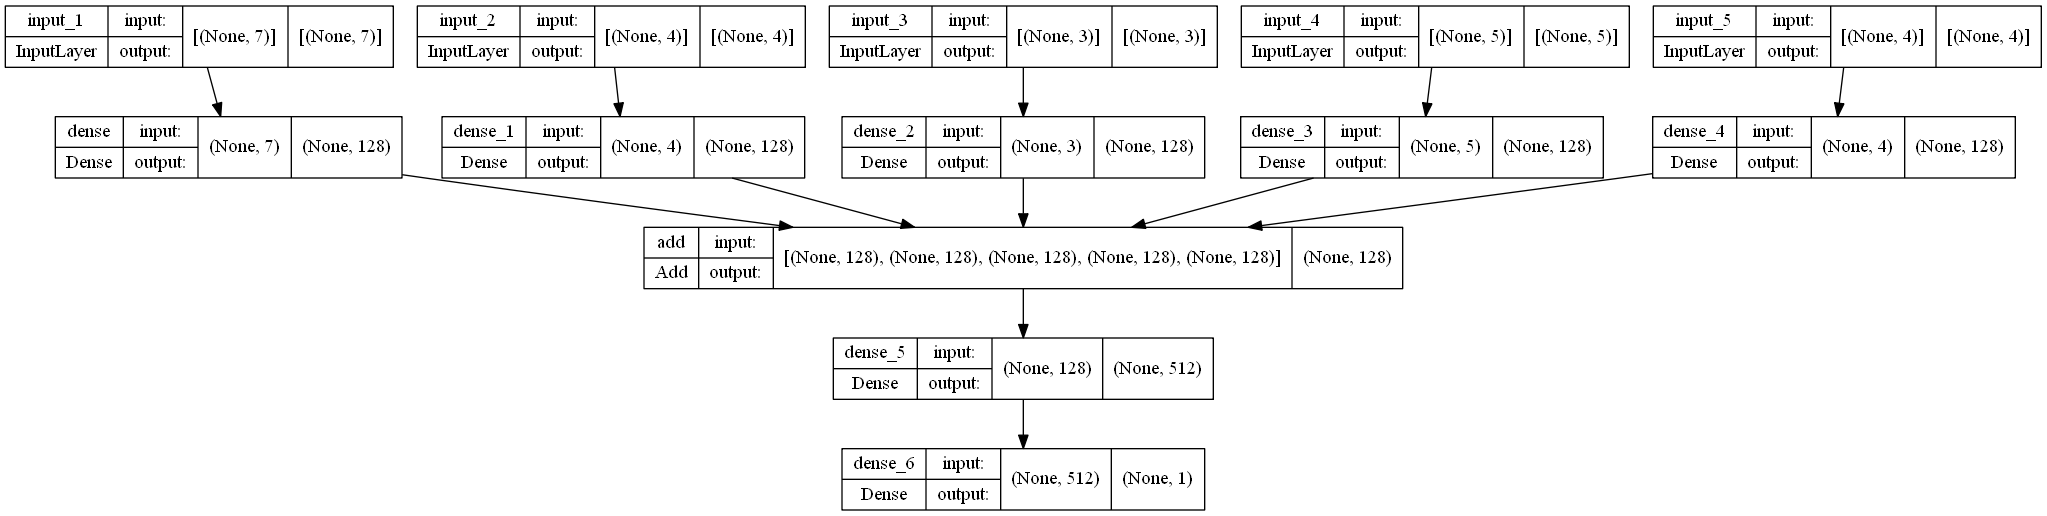

In [38]:
# 모델 시각화
plot_model(model, show_shapes=True)

### 모델 학습

In [39]:
from tensorflow.keras.callbacks import EarlyStopping

In [40]:
# 얼리스탑핑 값 설정
es = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, restore_best_weights=True)

In [41]:
# 모델학습
model.fit([role_tr, per_tr, reward_tr, car_tr, sat_tr], y_train, epochs=25, verbose=1, validation_split=0.15, callbacks=es)

Epoch 1/25
27/27 [==============================] - 1s 13ms/step - loss: 69.1803 - accuracy: 0.7741 - val_loss: 63.9760 - val_accuracy: 0.8467
Epoch 2/25
27/27 [==============================] - 0s 4ms/step - loss: 22.2854 - accuracy: 0.7518 - val_loss: 6.8575 - val_accuracy: 0.8467
Epoch 3/25
27/27 [==============================] - 0s 4ms/step - loss: 31.8325 - accuracy: 0.7788 - val_loss: 63.5959 - val_accuracy: 0.8467
Epoch 4/25
27/27 [==============================] - 0s 4ms/step - loss: 15.9251 - accuracy: 0.7365 - val_loss: 16.1472 - val_accuracy: 0.8467
Epoch 5/25
27/27 [==============================] - 0s 4ms/step - loss: 10.7556 - accuracy: 0.7576 - val_loss: 4.0057 - val_accuracy: 0.7400
Epoch 6/25
27/27 [==============================] - 0s 4ms/step - loss: 15.3299 - accuracy: 0.7576 - val_loss: 35.7237 - val_accuracy: 0.8467
Epoch 7/25
27/27 [==============================] - 0s 4ms/step - loss: 12.8003 - accuracy: 0.7424 - val_loss: 9.7823 - val_accuracy: 0.8333
Epoch 8/

### 모델 예측

In [42]:
y_pred = model.predict([role_te, per_te, reward_te, car_te, sat_test])

In [43]:
from sklearn.metrics import confusion_matrix, classification_report
for idx, val in enumerate(y_pred):
    if val >= 0.5:
        y_pred[idx] = 1
    else:
        y_pred[idx] = 0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[182  25]
 [ 30  13]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       207
           1       0.34      0.30      0.32        43

    accuracy                           0.78       250
   macro avg       0.60      0.59      0.59       250
weighted avg       0.77      0.78      0.77       250



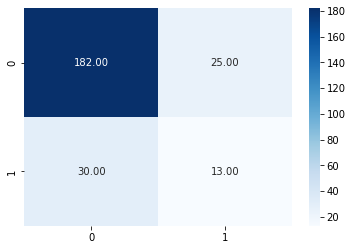

In [44]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='.2f')
plt.show()

In [45]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
score = {}
score['local model'] = [precision_score(y_test, y_pred),
                        recall_score(y_test, y_pred),
                        accuracy_score(y_test, y_pred)]

## 평가

1. 모델의 정확도를 기재하시오. 0.78
2. 이직이라 예측한 것 중 실제로 이직한 비율을 구하시오. 0.34
3. 실제 이직 데이터 중 모델이 이직이라 예측한 것의 비율을 구하시오. 0.30
4. 남는다고 예측한 것 중 실제로 남아있는 비율을 구하시오. 0.86
---
### hidden layer 2개를 사용한 multilayer perceptron 구조와 비교하시오.

In [46]:
x_train.shape

(1000, 23)

In [47]:
# 세션 클리어
clear_session()
# 모델 레이어 엮기
il = Input(shape=(23,))
hl = Dense(256, activation='relu')(il)
hl = Dense(512, activation='relu')(hl)
ol = Dense(1, activation='sigmoid')(hl)
# 모델 시작과 끝 설정
model = keras.Model(il, ol)
# 모델 컴파일
model.compile(loss=keras.losses.binary_crossentropy, metrics=['accuracy'], optimizer='adam')
# 모델 요약
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 23)]              0         
                                                                 
 dense (Dense)               (None, 256)               6144      
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 dense_2 (Dense)             (None, 1)                 513       
                                                                 
Total params: 138,241
Trainable params: 138,241
Non-trainable params: 0
_________________________________________________________________


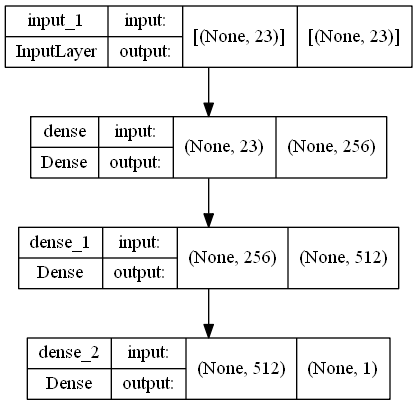

In [48]:
plot_model(model, show_shapes=True)

In [49]:
model.fit(x_train, y_train, epochs=25, verbose=1, validation_split=0.15, callbacks=es)

Epoch 1/25
27/27 [==============================] - 1s 9ms/step - loss: 155.4162 - accuracy: 0.7388 - val_loss: 59.7142 - val_accuracy: 0.8467
Epoch 2/25
27/27 [==============================] - 0s 4ms/step - loss: 18.2437 - accuracy: 0.7576 - val_loss: 37.5954 - val_accuracy: 0.8467
Epoch 3/25
27/27 [==============================] - 0s 4ms/step - loss: 41.7609 - accuracy: 0.7365 - val_loss: 70.3772 - val_accuracy: 0.8467
Epoch 4/25
27/27 [==============================] - 0s 4ms/step - loss: 55.7144 - accuracy: 0.7929 - val_loss: 59.9479 - val_accuracy: 0.8467
Epoch 5/25
27/27 [==============================] - 0s 5ms/step - loss: 23.8504 - accuracy: 0.7647 - val_loss: 14.4825 - val_accuracy: 0.8467
Epoch 6/25
27/27 [==============================] - 0s 4ms/step - loss: 20.4424 - accuracy: 0.7776 - val_loss: 13.3069 - val_accuracy: 0.8467
Epoch 7/25
27/27 [==============================] - 0s 4ms/step - loss: 26.6107 - accuracy: 0.7612 - val_loss: 5.9692 - val_accuracy: 0.8467
Epoch 

In [50]:
y_pred = model.predict(x_test)
for idx, val in enumerate(y_pred):
    if val >= 0.5:
        y_pred[idx] = 1
    else:
        y_pred[idx] = 0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 57 150]
 [  3  40]]
              precision    recall  f1-score   support

           0       0.95      0.28      0.43       207
           1       0.21      0.93      0.34        43

    accuracy                           0.39       250
   macro avg       0.58      0.60      0.39       250
weighted avg       0.82      0.39      0.41       250



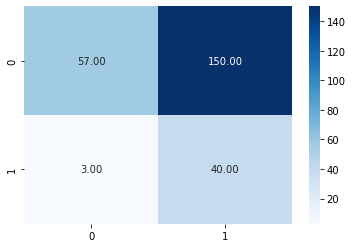

In [51]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='.2f')
plt.show()

In [52]:
score['model2'] = [precision_score(y_test, y_pred),
                   recall_score(y_test, y_pred),
                   accuracy_score(y_test, y_pred)]

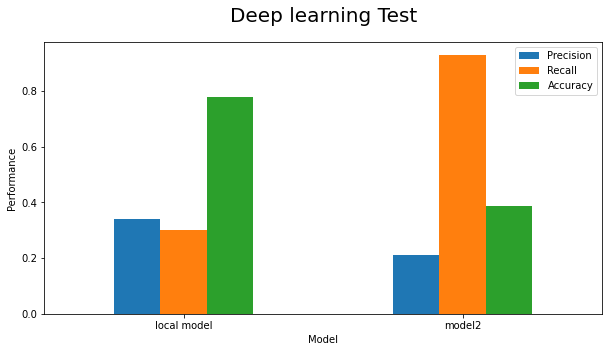

In [53]:
# 성능 비교
tmp = pd.DataFrame.from_dict(score, orient='index', columns=['Precision', 'Recall', 'Accuracy'])
tmp.plot(kind='bar')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.title('Deep learning Test', size=20, pad=20)
plt.xlabel('Model')
plt.ylabel('Performance')
plt.xticks(rotation = 0)
plt.show()

* 정확도가 높아 성능은 첫번째 모델이 좋지만 실제 이직을 예측할 확률은 두번째 모델이 높았다.
* 실제 이직하는 사람들을 찾아내는 것이 중요하기 때문에 성능은 낮지만 이직 여부 예측에 두번째 모델을 사용하는것이 좋아보인다.
* 전체적으로 두 모델 모두 적절한 예측이 어렵기 때문에 새로운 모델이나 튜닝이 필요하다